In [22]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import cv2
import base64
import imageio
from copy import deepcopy
from tqdm import tqdm
from pprint import pprint
from PIL import Image
import os
import imghdr

original_folder is the file path to our dataset

In [23]:
original_folder ="C:\\Users\\Ratanak\\Documents\\Term 9\\Machine Learning\\Face Recognition Project\\lfw_funneled"
preprocessed_folder = "C:\\Users\\Ratanak\\Documents\\Term 9\\Machine Learning\\Face Recognition Project\\preprocessed"

## Exploring number of image files across all people and find total number of image files

In [24]:
# Initialize counters
count_1 = 0
count_2 = 0
count_10 = 0
jpg_count = 0

# Iterate through each folder in the directory
for folder in os.listdir(original_folder):
    folder_path = os.path.join(original_folder, folder)
    if os.path.isdir(folder_path):
        # Initialize image count for the current folder
        image_count = 0

        # Iterate through files in the folder
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):
                # Check file extension
                if file.lower().endswith('.jpg'):
                    # Increment image count
                    image_count += 1
                    jpg_count += 1

        # Check image count and update counters
        if image_count == 1:
            count_1 += 1
        elif 1 < image_count < 10:
            count_2 += 1
        elif image_count >= 20:
            count_10 += 1

# Print the counts
print(f"Folders with 1 image: {count_1}")
print(f"Folders with more than 1 & less than 10 images: {count_2}")
print(f"Folders with more than 20 images: {count_10}")
print(f"Total JPG files: {jpg_count}")

Folders with 1 image: 4069
Folders with more than 1 & less than 10 images: 1522
Folders with more than 20 images: 62
Total JPG files: 13233


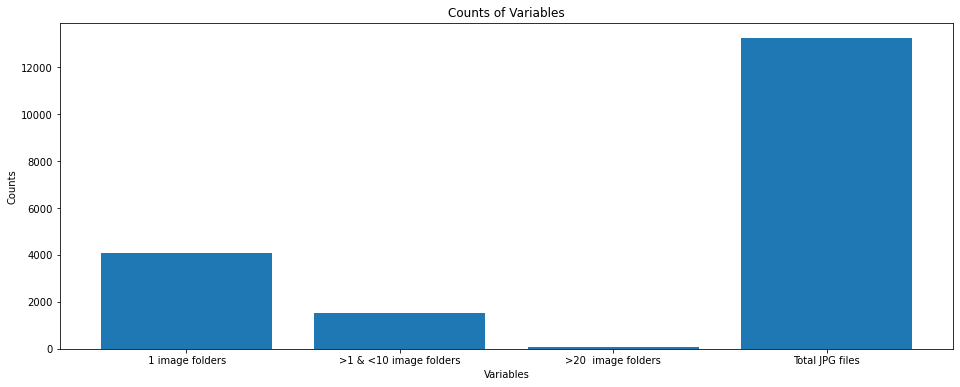

In [25]:
import matplotlib.pyplot as plt

# Define the variables
variables = [' 1 image folders', '>1 & <10 image folders',
             '>20  image folders', 'Total JPG files']
counts = [count_1, count_2, count_10, jpg_count]
plt.figure(figsize=(16, 6))
# Create a bar chart
plt.bar(variables, counts)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Counts')
plt.title('Counts of Variables')

# Display the chart
plt.show()

## Creating a dataframe which contains the 'person' columns and 'path' file directory

In [26]:
df = []  # Initialize an empty list

for path in glob.iglob(os.path.join(original_folder, "**", "*.jpg")):
    person = path.split("\\")[-2]
    df.append({"person": person, "path": path})

if df:  # Check if the list is not empty
    df = pd.DataFrame(df)
    df = df.groupby("person").filter(lambda x: len(x) < 550)
    print(df.head(10))
else:
    print("No matching files found.")

            person                                               path
0    Aaron_Eckhart  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
1      Aaron_Guiel  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
2  Aaron_Patterson  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
3    Aaron_Peirsol  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
4    Aaron_Peirsol  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
5    Aaron_Peirsol  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
6    Aaron_Peirsol  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
7       Aaron_Pena  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
8     Aaron_Sorkin  C:\Users\Ratanak\Documents\Term 9\Machine Lear...
9     Aaron_Sorkin  C:\Users\Ratanak\Documents\Term 9\Machine Lear...


In [27]:
df.shape

(13233, 2)

## Find top 5 people with most image files

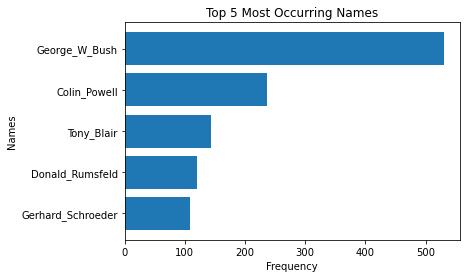

In [28]:
name_counts = df['person'].value_counts().sort_values(ascending=False)

# Get the top 5 most occurring names and their frequencies
top_names = name_counts.head(5)

# Create a figure and axis
fig, ax = plt.subplots()

# Get the top 5 most occurring names and their frequencies
top_names = name_counts.head(5)

# Extract the names and frequencies
names = top_names.index
frequencies = top_names.values

# Create a horizontal bar chart
ax.barh(names, frequencies)

# Add labels and title
ax.set_xlabel('Frequency')
ax.set_ylabel('Names')
ax.set_title('Top 5 Most Occurring Names')

# Invert the y-axis to display names from top to bottom
ax.invert_yaxis()

# Display the chart
plt.show()


In [29]:
# Print the top names and their frequencies
print("Top 5 most occurring names:")
for name, count in top_names.items():
    print(f"Name: {name} | Frequency: {count}")

Top 5 most occurring names:
Name: George_W_Bush | Frequency: 530
Name: Colin_Powell | Frequency: 236
Name: Tony_Blair | Frequency: 144
Name: Donald_Rumsfeld | Frequency: 121
Name: Gerhard_Schroeder | Frequency: 109


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13233 entries, 0 to 13232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  13233 non-null  object
 1   path    13233 non-null  object
dtypes: object(2)
memory usage: 310.1+ KB


In [31]:
df.describe()

,person,path
count,13233,13233
unique,5749,13233
top,George_W_Bush,C:\Users\Ratanak\Documents\Term 9\Machine Lear...
freq,530,1


#### from using describe(), we can see that total number of image files is 13233 , but there are only 5749 unique person, so some people have more image files than others, and proven right when we find top 5 people with most images before

In [39]:
# Count the number of images for each person
image_count = df['person'].value_counts()

# Filter the counts for people with more than 20 images
image_count_filtered = image_count[image_count >= 20]

# Print the filtered counts
print(image_count_filtered)

# Sum the counts for people with more than 20 images
total_count = image_count_filtered.sum()

# Print the total count
print("Total count:", total_count)

George_W_Bush        530
Colin_Powell         236
Tony_Blair           144
Donald_Rumsfeld      121
Gerhard_Schroeder    109
                    ... 
Angelina_Jolie        20
Paul_Bremer           20
Michael_Bloomberg     20
Igor_Ivanov           20
Jiang_Zemin           20
Name: person, Length: 62, dtype: int64
Total count: 3023


## find the size of each image files and append it as a colume

In [33]:
image_sizes = []

for file in df['path']:
    image = cv2.imread(file)
    if image is not None:  # Check if the image was successfully loaded
        size = image.shape[:2]  # Get the dimensions (height, width)
        image_sizes.append(size)

# Update the dataset DataFrame with the 'Size' column
df['size'] = image_sizes

df.head(10)

,person,path,size
0,Aaron_Eckhart,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
1,Aaron_Guiel,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
2,Aaron_Patterson,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
3,Aaron_Peirsol,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
4,Aaron_Peirsol,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
5,Aaron_Peirsol,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
6,Aaron_Peirsol,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
7,Aaron_Pena,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
8,Aaron_Sorkin,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"
9,Aaron_Sorkin,C:\Users\Ratanak\Documents\Term 9\Machine Lear...,"(250, 250)"


## visualize the distribution of image size

In [34]:
size_count = df['size'].value_counts()
print(size_count)

(250, 250)    13233
Name: size, dtype: int64


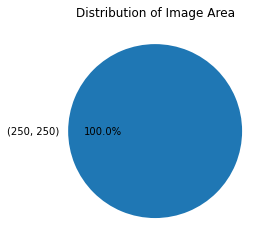

In [35]:
image_areas = df['size'] 

# Count the number of images with each area
unique_areas, counts = np.unique(image_areas, return_counts=True)

# Create a pie chart of the image area distribution
plt.pie(counts, labels=unique_areas, autopct="%1.1f%%")
plt.title('Distribution of Image Area')
plt.show()

#### from the chart , we can see that all images have the same size

## Display first 10 images

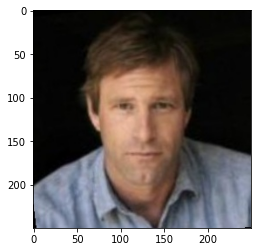

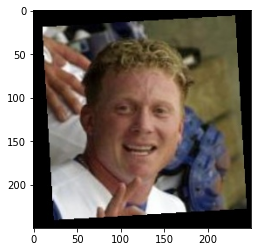

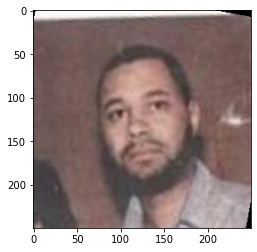

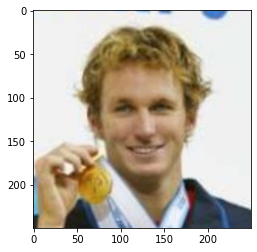

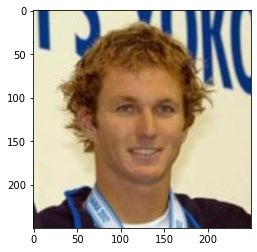

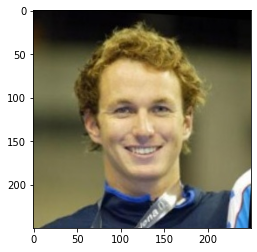

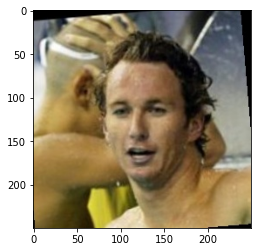

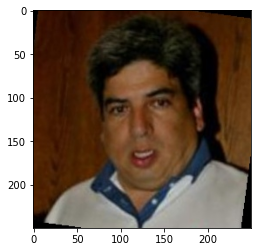

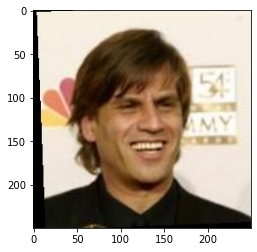

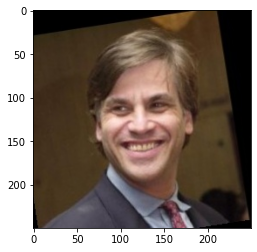

In [36]:
  for image_path in df['path'][0:10]:
    pic = plt.imread(image_path)
    plt.imshow(pic)
    plt.show()
  

#### from the results, we can see that although all the images are the same size, not all images are properly aligned, some are tilted in different angles